# Imports

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets
import regex as re
import string
import contractions
from spellchecker import SpellChecker
from wordcloud import WordCloud

In [102]:
import nltk
import nltk.corpus
from nltk.corpus import stopwords, words
from nltk.stem import WordNetLemmatizer

In [103]:
nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package words to /home/codespace/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Data

In [104]:
df = pd.read_csv('/workspaces/tswift_lyrics/genius_lyrics_collection/tswift_lyrics.csv')
df.head()

Album                        Song Name  \
0  Taylor Swift           A Perfectly Good Heart   
1  Taylor Swift            A Place In This World   
2  Taylor Swift                      Cold as You   
3  Taylor Swift    I'm Only Me When I'm With You   
4  Taylor Swift                        Invisible   

                                              Lyrics  
0  why would you wanna break a perfectly good hea...  
1  i dont know what i want so dont ask me cause i...  
2  you have a way of coming easily to me and when...  
3  friday night beneath the stars in a field behi...  
4  she cant see the way your eyes light up when y...

In [105]:
df.describe()

Album                 Song Name  \
count                                           229                       229   
unique                                           15                       229   
top     The Tortured Poets Department The Anthology    A Perfectly Good Heart   
freq                                             31                         1   

                                                   Lyrics  
count                                                 229  
unique                                                229  
top     why would you wanna break a perfectly good hea...  
freq                                                    1

# Text Cleaning

In [106]:
# note: punctuation was removed and words were made lowercase after downloading

# remove non-ASCII charaacters and contractions
# including 'wanna' and 'gonna'; 'na' was previously the sixth most frequently used word
df['clean_lyrics'] = df['Lyrics'].str.encode('ascii', 'ignore').str.decode('ascii').apply(lambda x: [contractions.fix(word) for word in x.split()]).apply(lambda x: ', '.join(x))

df.head()

Album                        Song Name  \
0  Taylor Swift           A Perfectly Good Heart   
1  Taylor Swift            A Place In This World   
2  Taylor Swift                      Cold as You   
3  Taylor Swift    I'm Only Me When I'm With You   
4  Taylor Swift                        Invisible   

                                              Lyrics  \
0  why would you wanna break a perfectly good hea...   
1  i dont know what i want so dont ask me cause i...   
2  you have a way of coming easily to me and when...   
3  friday night beneath the stars in a field behi...   
4  she cant see the way your eyes light up when y...   

                                        clean_lyrics  
0  why, would, you, want to, break, a, perfectly,...  
1  i, do not, know, what, i, want, so, do not, as...  
2  you, have, a, way, of, coming, easily, to, me,...  
3  friday, night, beneath, the, stars, in, a, fie...  
4  she, cannot, see, the, way, your, eyes, light,...

In [107]:
# check for misspelled words

# initialize spell checker
spell = SpellChecker()

# find misspelled words
misspelled = spell.unknown(df['clean_lyrics'])
misspelled_list = list(misspelled)

if len(misspelled_list) == 0:
    print('No misspelled words!')
else:
    print(misspelled_list)
    for word in misspelled:
        print(spell.corrections(word))
        print(spell.candidates(word))

No misspelled words!


## Tokenization and Lemmatization

In [108]:
# define English words and stopwords
english_words = set(words.words())
stop = stopwords.words('english')

print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [109]:
# remove stopwords and tokenize lyrics
# create new column for tokenized lyrics
# len(word) > 2 removes words like 'oh' (previously most common word)
df['tokenized_lyrics'] = df['clean_lyrics'].apply(nltk.word_tokenize)
df['tokenized_lyrics'] = df['tokenized_lyrics'].apply(lambda words: [word for word in words
                                                                     if word not in stop
                                                                     and len(word) > 2])
                                                                     
# initialize wordnet lemmatizer
lemmatizer = WordNetLemmatizer()

# create new column for lemmatized lyrics
df['lemmatized_lyrics'] = df['tokenized_lyrics'].apply(lambda lst:[lemmatizer.lemmatize(word) for word in lst])                                                                     

df.head()

Album                        Song Name  \
0  Taylor Swift           A Perfectly Good Heart   
1  Taylor Swift            A Place In This World   
2  Taylor Swift                      Cold as You   
3  Taylor Swift    I'm Only Me When I'm With You   
4  Taylor Swift                        Invisible   

                                              Lyrics  \
0  why would you wanna break a perfectly good hea...   
1  i dont know what i want so dont ask me cause i...   
2  you have a way of coming easily to me and when...   
3  friday night beneath the stars in a field behi...   
4  she cant see the way your eyes light up when y...   

                                        clean_lyrics  \
0  why, would, you, want to, break, a, perfectly,...   
1  i, do not, know, what, i, want, so, do not, as...   
2  you, have, a, way, of, coming, easily, to, me,...   
3  friday, night, beneath, the, stars, in, a, fie...   
4  she, cannot, see, the, way, your, eyes, light,...   

                                    tokenized_lyrics  \
0  [would, want, break, perfectly, good, heart, w...   
1  [know, want, ask, still, trying, figure, know,...   
2  [way, coming, easily, take, take, best, start,...   
3  [friday, night, beneath, stars, field, behind,...   
4  [see, way, eyes, light, smile, never, notice, ...   

                                   lemmatized_lyrics  
0  [would, want, break, perfectly, good, heart, w...  
1  [know, want, ask, still, trying, figure, know,...  
2  [way, coming, easily, take, take, best, start,...  
3  [friday, night, beneath, star, field, behind, ...  
4  [see, way, eye, light, smile, never, notice, s...

In [110]:
# save the dataframe as csv
df.to_csv('tswift_lyrics_clean.csv')

## Series of All Words

In [111]:
# join words in 'lemmatized_lyric' column to single list
lyric_words = df['lemmatized_lyrics'].explode().to_list()

# create pandas series from list
lyric_series = pd.Series(lyric_words)

print(len(lyric_words))
print(lyric_words[:100])

37097
['would', 'want', 'break', 'perfectly', 'good', 'heart', 'would', 'want', 'take', 'love', 'tear', 'apart', 'would', 'want', 'make', 'first', 'scar', 'would', 'want', 'break', 'perfectly', 'good', 'heart', 'maybe', 'seen', 'sign', 'read', 'writing', 'wall', 'realized', 'distance', 'eye', 'would', 'one', 'fall', 'matter', 'say', 'still', 'believe', 'would', 'walk', 'away', 'make', 'sense', 'would', 'want', 'break', 'perfectly', 'good', 'heart', 'would', 'want', 'take', 'love', 'tear', 'apart', 'would', 'want', 'make', 'first', 'scar', 'would', 'want', 'break', 'perfectly', 'good', 'heart', 'unbroken', 'anymore', 'unbroken', 'anymore', 'get', 'back', 'way', 'would', 'want', 'break', 'perfectly', 'good', 'heart', 'would', 'want', 'take', 'love', 'tear', 'apart', 'would', 'want', 'make', 'first', 'scar', 'would', 'want', 'break', 'would', 'want', 'break', 'would', 'want', 'break']


# Most Frequent Words

In [112]:
# count no. of occurences of each word in lyric_series
word_count = lyric_series.value_counts().reset_index()

# name columns
word_count.columns = ['Word', 'Count']

# show word count table
word_count.head(15).style.background_gradient()

## Most Freq. Words - Bar Chart

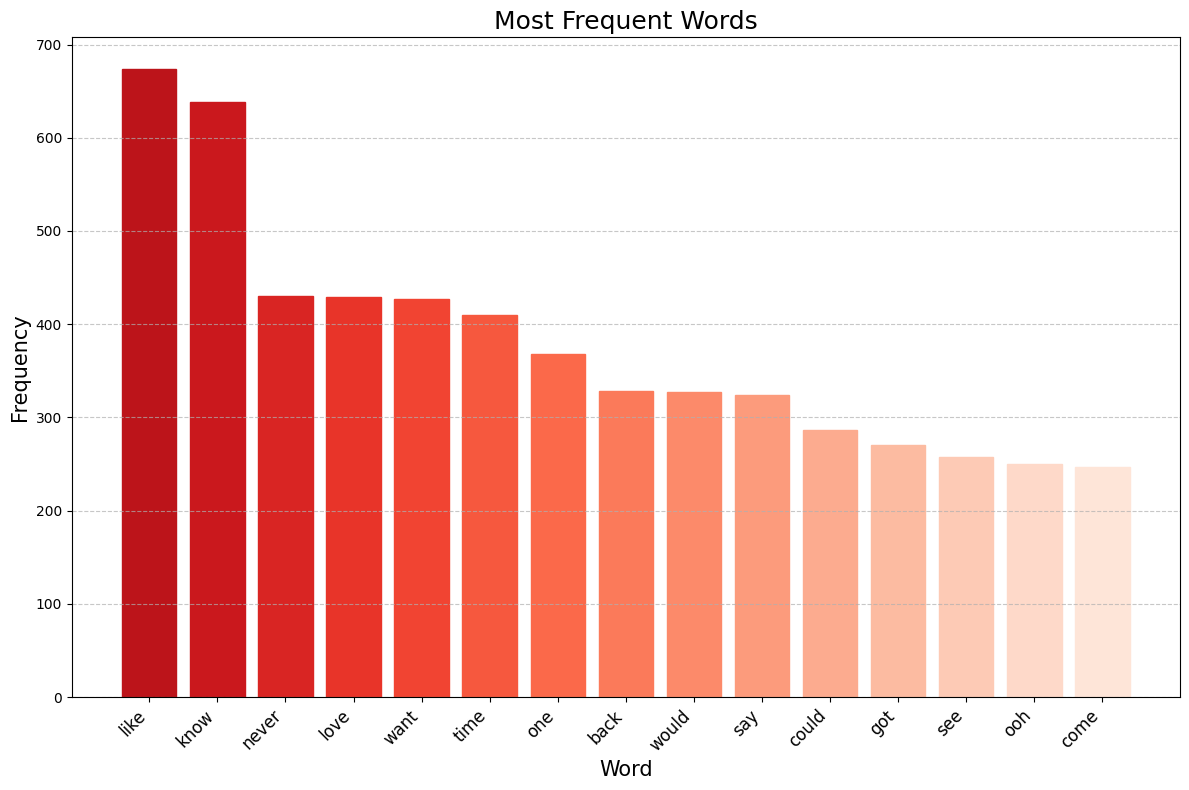

In [113]:
# define colors using a colormap
colors = plt.cm.Reds(np.linspace(0.8, 0.1, len(word_count['Word'][:15])))

# plot the top 15 most frequent words
plt.figure(figsize=(12, 8))
bars = plt.bar(word_count['Word'][:15],
               word_count['Count'][:15],
               color=colors
               )

# add color gradient to bars
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.xlabel('Word', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Most Frequent Words', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Most Freq. Words - Word Cloud

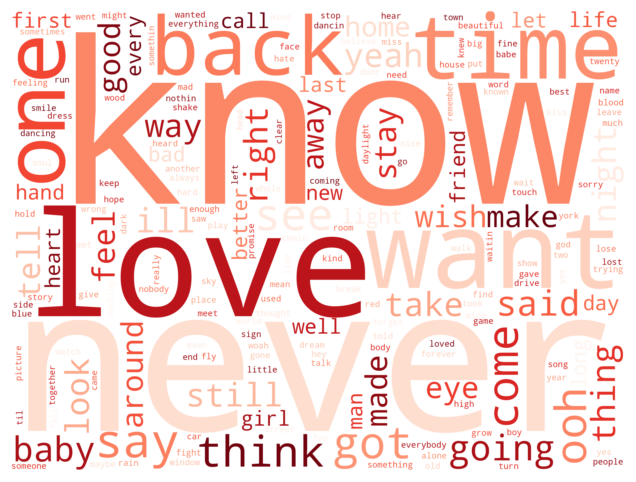

In [114]:
# define text to use
text = ' '.join(lyric_words)

# generate the WordCloud
wordcloud = WordCloud(relative_scaling = 0.3,
                    min_font_size = 1,
                    background_color = 'white',
                    width = 1024,
                    height = 768,
                    max_words = 200,
                    colormap = 'Reds',
                    scale = 3,
                    font_step = 4,
                    collocations = False,
                    margin = 5).generate(text)

# display WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# note: does not show 'like'

## Specific Words

In [115]:
# function to find words in list
def find_words(word: str, pattern: str) -> int:
    return len(re.findall(pattern, word.lower()))

# functions to graph number of occurences of words in list by album
# static stacked bar chart
def plot_stacked_bar_graph(plotdata, legend, title, ylabel):
    plotdata.plot(kind='bar', stacked=True, figsize=(16, 12)).legend(loc='upper left', ncol=3, title=legend)
    # plot legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, title=legend)
    plt.subplots_adjust(right=0.7)
    # add titles
    plt.title(title, fontsize=20)
    plt.xlabel('Album', fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    # show plot
    plt.show()
    
# interactive stacked bar chart
def plot_interactive_bar_graph(data, legend, ylabel, title):
    fig = px.bar(data,
                labels={'variable' : legend,
                        'value' : ylabel},
                title=title,
                )
    fig.show()

### Swear Words

In [116]:
# create new dataframe for understanding swear words
df_swears = df[['Album', 'Song Name', 'Lyrics']].copy()

# create list of swear words
swears_list = [' hell ', ' bitch ', ' bitches ', ' bitchin ', ' asshole ', ' shit ', ' shitty ', ' shitstorm ',
                ' damn ', ' damned ', ' goddamn ', ' pissed ', ' fuck ', ' fuckin ', ' fucking ', ' fucked ',
                ' sexy ', ' whore ', ' slut ', ' dickhead ', ' godforsaken ']

# loop through each string in swears_list
# apply find_words function
for col in swears_list:
    df_swears[col] = df_swears['Lyrics'].apply(find_words, pattern=col)

df_swears.tail()

Album  \
224  The Tortured Poets Department The Anthology   
225  The Tortured Poets Department The Anthology   
226  The Tortured Poets Department The Anthology   
227  The Tortured Poets Department The Anthology   
228  The Tortured Poets Department The Anthology   

                           Song Name  \
224    The Tortured Poets Department   
225    Who's Afraid of Little Old Me   
226              ​​imgonnagetyouback   
227                ​​thanK you aIMee   
228                             loml   

                                                Lyrics   hell    bitch   \
224  you left your typewriter at my apartment strai...       0        0   
225  the whos who of whos that is poised for the at...       0        0   
226  yeah  lilac short skirt the one that fits me l...       0        0   
227  when i picture my hometown theres a bronze spr...       0        0   
228  whos gonna stop us from waltzing back into rek...       1        0   

      bitches    bitchin    asshole    shit    shitty   ...   pissed    fuck   \
224          0          0          0       0         0  ...         0       0   
225          0          0          0       0         0  ...         0       0   
226          0          0          0       0         0  ...         0       0   
227          0          0          0       0         0  ...         0       2   
228          0          0          0       1         0  ...         0       0   

      fuckin    fucking    fucked    sexy    whore    slut    dickhead   \
224         0          2         0       0        0       0           0   
225         0          0         0       0        0       0           0   
226         0          0         0       0        0       0           0   
227         0          0         0       0        0       0           0   
228         0          0         0       0        0       0           0   

      godforsaken   
224              0  
225              0  
226              0  
227              0  
228              0  

[5 rows x 24 columns]

In [117]:
# create new reduced dataframe
df_swears_reduced = df_swears[['Album', ' hell ', ' bitch ', ' bitches ', ' bitchin ', ' asshole ', ' shit ', ' shitty ', ' shitstorm ',
                                ' damn ', ' damned ', ' goddamn ', ' pissed ', ' fuck ', ' fuckin ', ' fucking ', ' fucked ', ' sexy ', ' whore ',
                                ' slut ', ' dickhead ', ' godforsaken ']].copy()

# remove spaces from column names and combine similar swear words
df_swears_reduced['hell'] = df_swears_reduced[[' hell ']]
df_swears_reduced['bitch'] = df_swears_reduced[[' bitch ', ' bitches ', ' bitchin ']].sum(axis=1)
df_swears_reduced['asshole'] = df_swears_reduced[[' asshole ']]
df_swears_reduced['shit'] = df_swears_reduced[[' shit ', ' shitty ', ' shitstorm ']].sum(axis=1)
df_swears_reduced['damn'] = df_swears_reduced[[' damn ', ' damned ', ' goddamn ']].sum(axis=1)
df_swears_reduced['pissed'] = df_swears_reduced[[' pissed ']]
df_swears_reduced['fuck'] = df_swears_reduced[[' fuck ', ' fuckin ', ' fucking ', ' fucked ']].sum(axis=1)
df_swears_reduced['sexy'] = df_swears_reduced[[' sexy ']]
df_swears_reduced['whore'] = df_swears_reduced[[' whore ']]
df_swears_reduced['slut'] = df_swears_reduced[[' slut ']]
df_swears_reduced['dickhead'] = df_swears_reduced[[' dickhead ']]
df_swears_reduced['godforsaken'] = df_swears_reduced[[' godforsaken ']]

# drop now-unnecessary columns
df_swears_reduced = df_swears_reduced.drop([' hell ', ' bitch ', ' bitches ', ' bitchin ', ' asshole ', ' shit ', ' shitty ',
                                            ' shitstorm ', ' damn ', ' damned ', ' goddamn ', ' pissed ', ' fuck ', ' fuckin ', ' fucking ',
                                            ' fucked ', ' sexy ', ' whore ', ' slut ', ' dickhead ', ' godforsaken '],
                                            axis=1)

# combine album rows
df_swears_reduced = df_swears_reduced.groupby('Album').sum()

df_swears_reduced

hell  bitch  asshole  shit  damn  \
Album                                                                           
1989 Deluxe                                     2      0        0     0     1   
1989 Taylors Version                            0      0        0     0     0   
Fearless Platinum Edition                       0      0        0     0     0   
Fearless Taylors Version                        0      0        0     0     0   
Lover                                           2      2        0     0     1   
Midnights The Til Dawn Edition                  3      0        1    14    12   
Red Deluxe Edition                              2      0        0     0     0   
Red Taylors Version                             2      0        0     1     0   
Reputation                                      0      0        0     1     2   
Speak Now Deluxe Edition                        0      0        0     0     0   
Speak Now Taylors Version                       1      0        0     0     0   
Taylor Swift                                    0      0        0     0     1   
The Tortured Poets Department The Anthology    13      5        0     6     2   
evermore deluxe version                         0      0        0     4    11   
folklore deluxe version                         2      1        0     3     1   

                                             pissed  fuck  sexy  whore  slut  \
Album                                                                          
1989 Deluxe                                       0     0     0      0     0   
1989 Taylors Version                              0     0     0      0     4   
Fearless Platinum Edition                         0     0     0      0     0   
Fearless Taylors Version                          0     0     0      0     0   
Lover                                             0     0     0      0     0   
Midnights The Til Dawn Edition                    0     7     1      0     0   
Red Deluxe Edition                                0     0     0      0     0   
Red Taylors Version                               0     1     0      0     0   
Reputation                                        0     0     0      0     0   
Speak Now Deluxe Edition                          0     0     0      0     0   
Speak Now Taylors Version                         0     0     0      0     0   
Taylor Swift                                      0     0     0      0     0   
The Tortured Poets Department The Anthology       1    30     1      2     0   
evermore deluxe version                           0     2     0      0     0   
folklore deluxe version                           0     3     0      0     0   

                                             dickhead  godforsaken  
Album                                                               
1989 Deluxe                                         0            0  
1989 Taylors Version                                0            0  
Fearless Platinum Edition                           0            0  
Fearless Taylors Version                            0            0  
Lover                                               0            0  
Midnights The Til Dawn Edition                      1            0  
Red Deluxe Edition                                  0            0  
Red Taylors Version                                 0            0  
Reputation                                          0            0  
Speak Now Deluxe Edition                            0            0  
Speak Now Taylors Version                           0            0  
Taylor Swift                                        0            0  
The Tortured Poets Department The Anthology         0            0  
evermore deluxe version                             0            0  
folklore deluxe version                             0            1

#### Swear Words - Bar Charts

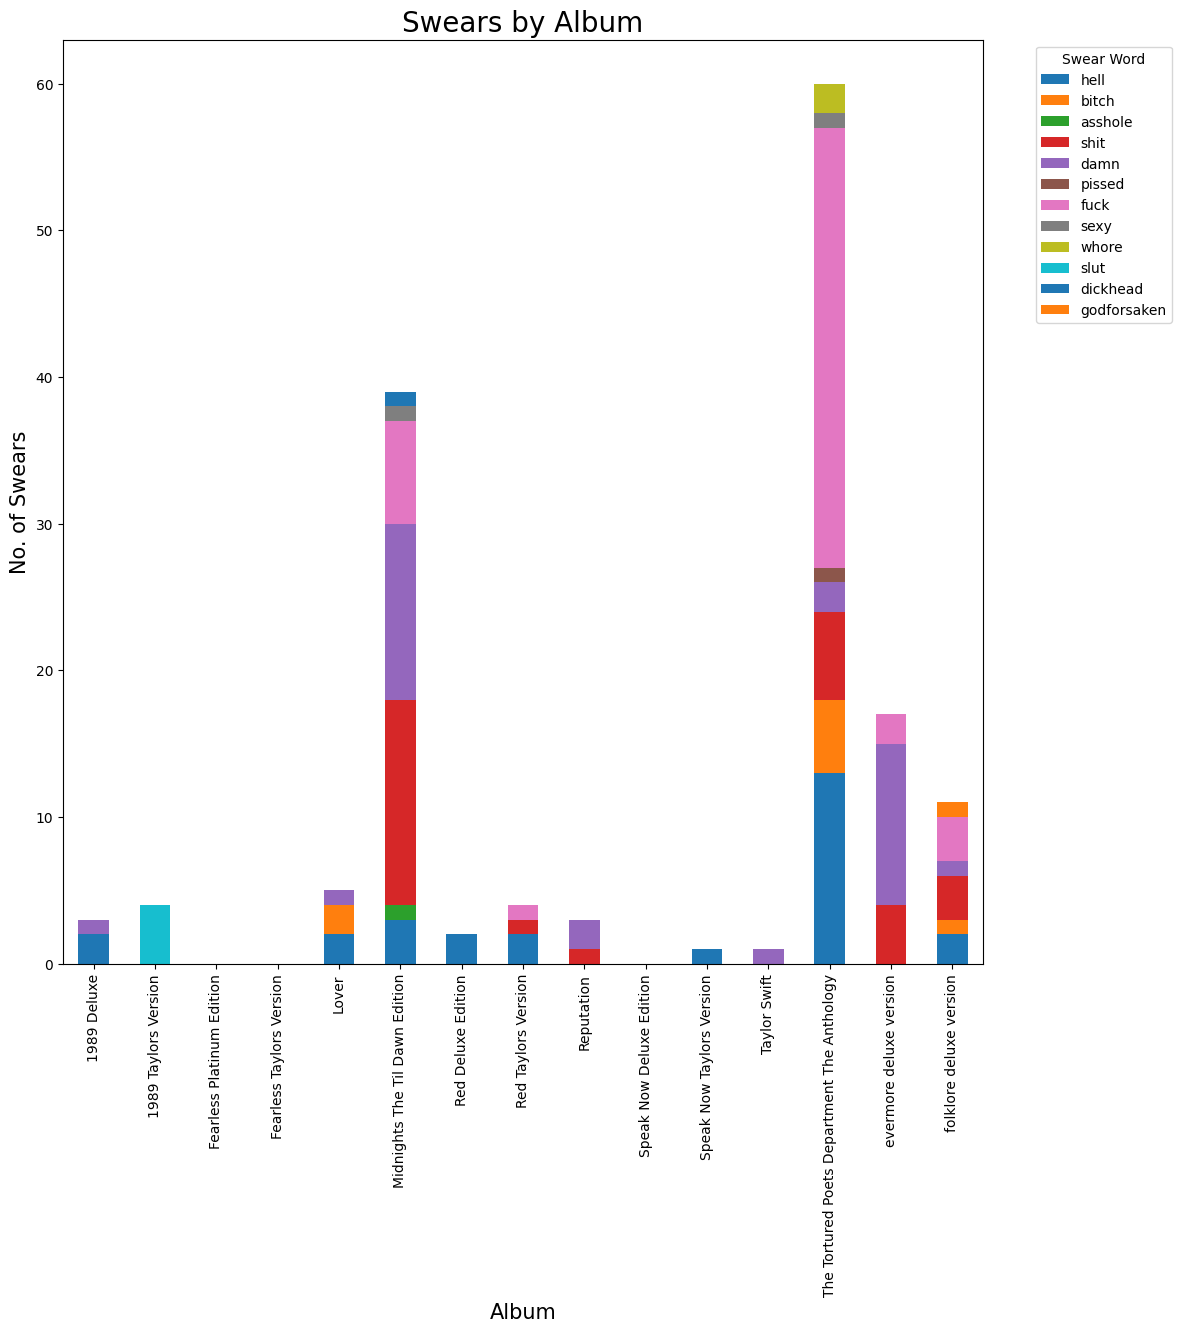

In [118]:
# number of swear words by album color-coded by word

# define data
plotdata = df_swears_reduced[['hell', 'bitch', 'asshole', 'shit', 'damn', 'pissed', 'fuck', 'sexy', 'whore', 'slut', 'dickhead', 'godforsaken']]

# call function to create static stacked bar graph
plot_stacked_bar_graph(plotdata, 'Swear Word', 'Swears by Album', 'No. of Swears')

# call function to create interactive stacked bar graph
plot_interactive_bar_graph(df_swears_reduced, 'Swear Word', 'No. of Words', 'Swear Words by Album')

### References to Drugs and Alcohol

In [119]:
# create new dataframe for understanding drug references
df_drugs = df[['Album', 'Song Name', 'Lyrics']].copy()

# create list of drug references
drug_list = [' alcohol ', ' alcoholic ', ' bar ', ' drink ', ' drinkin ', ' drinking ', ' drunk ',
            ' sober ', ' beer ', ' beers ', ' wine ', ' rosé ', ' merlot ', ' champagne ', ' dom pérignon ',
            ' liquor ', ' whiskey ', ' old fashioned ', ' patrón ', ' island breeze ', 
            ' drug ', ' drugs ', ' weed ', ' smoke ', ' smoking ', ' smokin ', ' smoked ', ' stoned ',
            ' overdose ', ' narcotics ', ' heroin ', ' dopamine ', ' pills ', ' doin lines ']

# loop through each string in drug_list
# apply find_words function
for col in drug_list:
    df_drugs[col] = df_drugs['Lyrics'].apply(find_words, pattern=col)

df_drugs.head(2)

Album                 Song Name  \
0  Taylor Swift    A Perfectly Good Heart   
1  Taylor Swift     A Place In This World   

                                              Lyrics   alcohol    alcoholic   \
0  why would you wanna break a perfectly good hea...          0            0   
1  i dont know what i want so dont ask me cause i...          0            0   

    bar    drink    drinkin    drinking    drunk   ...   smoking    smokin   \
0      0        0          0           0        0  ...          0         0   
1      0        0          0           0        0  ...          0         0   

    smoked    stoned    overdose    narcotics    heroin    dopamine    pills   \
0         0         0           0            0         0           0        0   
1         0         0           0            0         0           0        0   

    doin lines   
0             0  
1             0  

[2 rows x 37 columns]

In [120]:
# create new reduced dataframe
df_drug_reduced = df_drugs[['Album', ' alcohol ', ' alcoholic ', ' bar ', ' drink ', ' drinkin ', ' drinking ',
                            ' drunk ', ' sober ', ' beer ', ' beers ', ' wine ', ' rosé ', ' merlot ', ' champagne ', ' dom pérignon ',
                            ' liquor ', ' whiskey ', ' old fashioned ', ' patrón ', ' island breeze ', 
                            ' drug ', ' drugs ', ' weed ', ' smoke ', ' smoking ', ' smokin ', ' smoked ', ' stoned ',
                            ' overdose ', ' narcotics ', ' heroin ', ' dopamine ', ' pills ', ' doin lines ']].copy()

# remove spaces and combine similar swear words
df_drug_reduced['alcohol'] = df_drug_reduced[[' alcohol ', ' alcoholic ']].sum(axis=1)
df_drug_reduced['bar'] = df_drug_reduced[[' bar ']]
df_drug_reduced['drink'] = df_drug_reduced[[' drink ', ' drinkin ', ' drinking ', ' drunk ']].sum(axis=1)
df_drug_reduced['sober'] = df_drug_reduced[[' sober ']]
df_drug_reduced['beer'] = df_drug_reduced[[' beer ', ' beers ']].sum(axis=1)
df_drug_reduced['wine'] = df_drug_reduced[[' wine ', ' rosé ', ' merlot ']].sum(axis=1)
df_drug_reduced['champagne'] = df_drug_reduced[[' champagne ', ' dom pérignon ']].sum(axis=1)
df_drug_reduced['liquor'] = df_drug_reduced[[' liquor ', ' whiskey ', ' patrón ']].sum(axis=1)
df_drug_reduced['mixed drinks'] = df_drug_reduced[[' old fashioned ', ' island breeze ']].sum(axis=1)
df_drug_reduced['drug'] = df_drug_reduced[[' drug ', ' drugs ']].sum(axis=1)
df_drug_reduced['weed'] = df_drug_reduced[[' weed ']]
df_drug_reduced['smoke'] = df_drug_reduced[[' smoke ', ' smoking ', ' smokin ', ' smoked ']].sum(axis=1)
df_drug_reduced['stoned'] = df_drug_reduced[[' stoned ']]
df_drug_reduced['overdose'] = df_drug_reduced[[' overdose ']]
df_drug_reduced['narcotics'] = df_drug_reduced[[' narcotics ']]
df_drug_reduced['heroin'] = df_drug_reduced[[' heroin ']]
df_drug_reduced['dopamine'] = df_drug_reduced[[' dopamine ']]
df_drug_reduced['pills'] = df_drug_reduced[[' pills ']]
df_drug_reduced['doin lines'] = df_drug_reduced[[' doin lines ']]

# drop now-unnecessary columns
df_drug_reduced = df_drug_reduced.drop([' alcohol ', ' alcoholic ', ' bar ', ' drink ', ' drinkin ', ' drinking ', ' drunk ',
                                        ' sober ', ' beer ', ' beers ', ' wine ', ' rosé ', ' merlot ', ' champagne ', ' dom pérignon ',
                                        ' liquor ', ' whiskey ', ' old fashioned ', ' patrón ', ' island breeze ', 
                                        ' drug ', ' drugs ', ' weed ', ' smoke ', ' smoking ', ' smokin ', ' smoked ', ' stoned ',
                                        ' overdose ', ' narcotics ', ' heroin ', ' dopamine ', ' pills ', ' doin lines '
                                        ], axis=1)

# combine album rows
df_drug_reduced = df_drug_reduced.groupby('Album').sum()

df_drug_reduced.head(2)

alcohol  bar  drink  sober  beer  wine  champagne  \
Album                                                                     
1989 Deluxe                 0    0      1      1     0     1          0   
1989 Taylors Version        0    0      6      0     0     0          0   

                      liquor  mixed drinks  drug  weed  smoke  stoned  \
Album                                                                   
1989 Deluxe                0             0     0     0      0       0   
1989 Taylors Version       0             0     0     0      1       0   

                      overdose  narcotics  heroin  dopamine  pills  doin lines  
Album                                                                           
1989 Deluxe                  0          0       0         0      0           0  
1989 Taylors Version         0          0       0         0      0           0

#### Drugs & Alcohol - Bar Charts

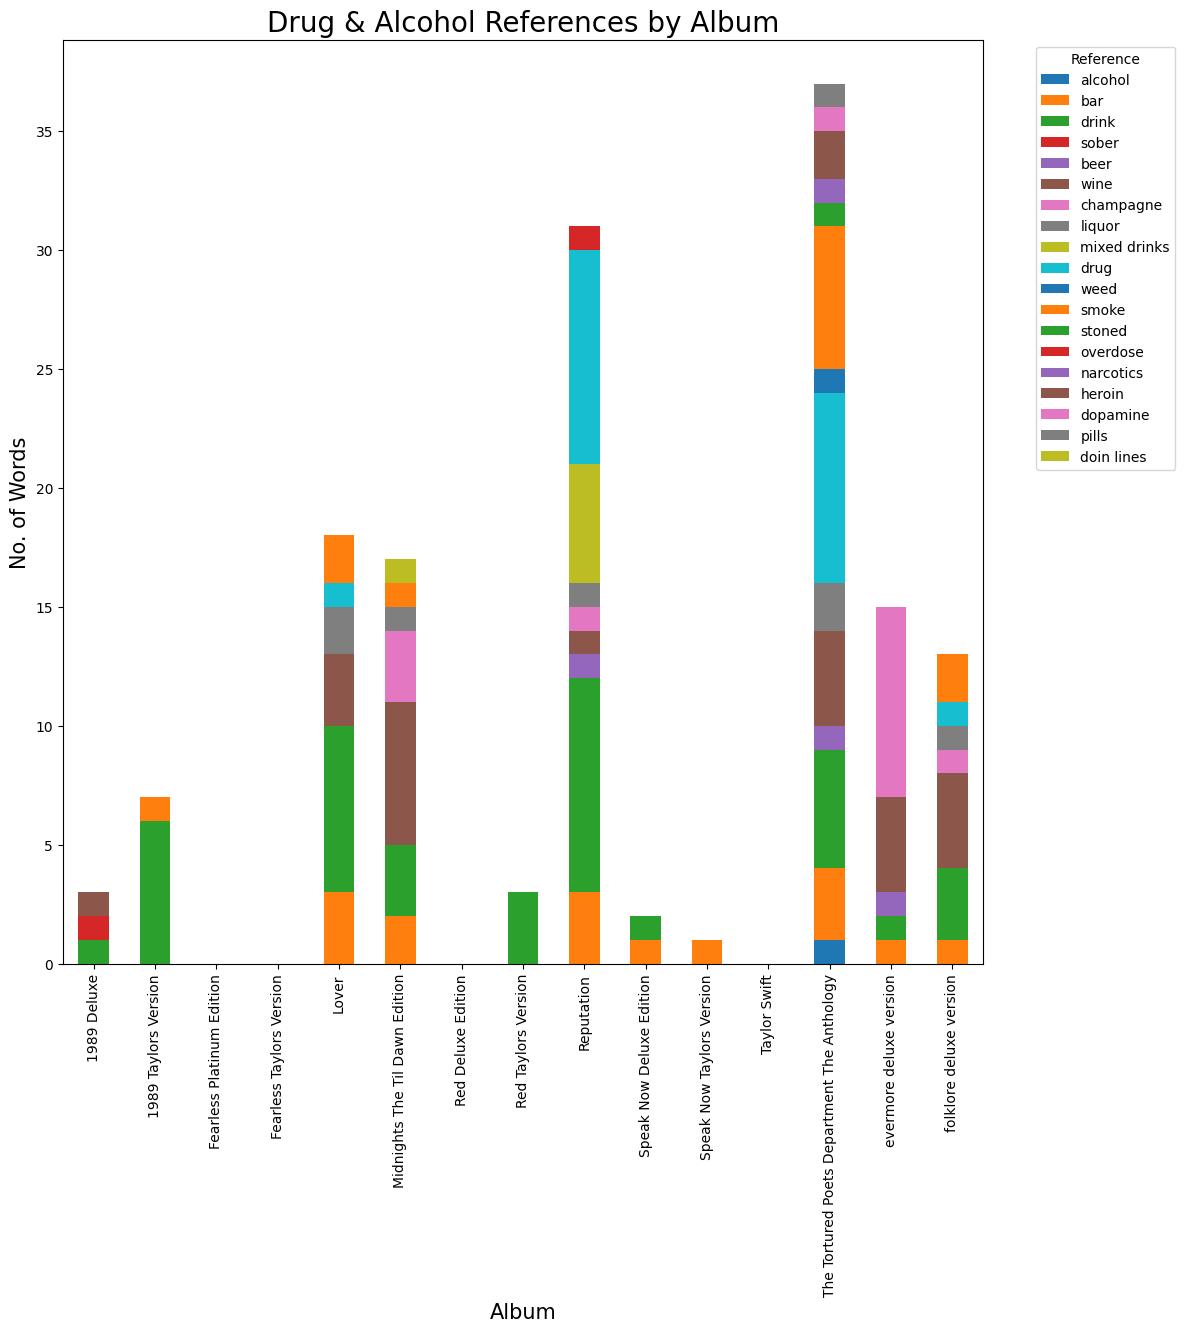

In [121]:
# number of drug references by album color-coded by word

# define data
plotdata = df_drug_reduced[['alcohol', 'bar', 'drink', 'sober', 'beer', 'wine', 'champagne', 'liquor', 'mixed drinks', 'drug', 'weed',
                            'smoke', 'stoned', 'overdose', 'narcotics', 'heroin', 'dopamine', 'pills', 'doin lines']]

# call function to create static stacked bar graph
plot_stacked_bar_graph(plotdata, 'Reference', 'Drug & Alcohol References by Album', 'No. of Words')

# call function to create interactive stacked bar graph
plot_interactive_bar_graph(df_drug_reduced, 'Reference', 'No. of Words', 'Drug & Alcohol References by ALbum')

### References to Religion

In [122]:
# create new dataframe for understanding religious words
df_rlgn = df[['Album', 'Song Name', 'Lyrics']].copy()

# create list of religious words
rlgn_list = [' amen ', ' christian ', ' church ', ' faith ', ' faithless ', ' god ', ' gods ', ' lord ', ' devil ', ' devils ',
            ' angel ', ' angels ', ' demons ', ' saint ', ' saintly ', ' jesus ', ' holy ', ' pray ', ' praying ', ' prayer ',
            ' altar ', ' sin ', ' guilty ', ' guilt ', ' hell ', ' heaven ', ' heavenly ', ' halo ', ' preacher ', ' christmas ',
            ' methodist ', ' jehovahs witness ', ' hallelujah ', ' forgive ', ' forgiveness ', ' forgiven ', ' unforgiven ',
            ' priest ', ' confess ', ' confessions ', ' religion ', ' religions ', ' religious ', ' epiphany ', ' grace ', ' sacred ',
            ' worship ', ' worshipping ', ' soul ', ' spirit ', ' prophecy ', ' miracle ', ' bless ', ' crucify ', ' temple ',
            ' eve ', ' exorcise ']

# loop through each string in rlgn_list
# apply find_words function
for col in rlgn_list:
    df_rlgn[col] = df_rlgn['Lyrics'].apply(find_words, pattern=col)

df_rlgn.head(2)

Album                 Song Name  \
0  Taylor Swift    A Perfectly Good Heart   
1  Taylor Swift     A Place In This World   

                                              Lyrics   amen    christian   \
0  why would you wanna break a perfectly good hea...       0            0   
1  i dont know what i want so dont ask me cause i...       0            0   

    church    faith    faithless    god    gods   ...   worshipping    soul   \
0         0        0            0      0       0  ...              0       0   
1         0        0            0      0       0  ...              0       0   

    spirit    prophecy    miracle    bless    crucify    temple    eve   \
0         0           0          0        0          0         0      0   
1         0           0          0        0          0         0      0   

    exorcise   
0           0  
1           0  

[2 rows x 60 columns]

In [123]:
# create new reduced dataframe
df_rlgn_reduced = df_rlgn[['Album', ' amen ', ' christian ', ' church ', ' faith ', ' faithless ', ' god ', ' gods ',
                            ' lord ', ' devil ', ' devils ', ' angel ', ' angels ', ' demons ', ' saint ', ' saintly ',
                            ' jesus ', ' holy ', ' pray ', ' praying ', ' prayer ', ' altar ', ' sin ', ' guilty ', ' guilt ',
                            ' hell ', ' heaven ', ' heavenly ', ' halo ', ' preacher ', ' christmas ', ' methodist ',
                            ' jehovahs witness ', ' hallelujah ', ' forgive ', ' forgiveness ', ' forgiven ', ' unforgiven ',
                            ' priest ', ' confess ', ' confessions ', ' religion ', ' religions ', ' religious ', ' epiphany ',
                            ' grace ', ' sacred ', ' worship ', ' worshipping ', ' soul ', ' spirit ', ' prophecy ', ' miracle ',
                            ' bless ', ' crucify ', ' temple ', ' eve ', ' exorcise '
                            ]].copy()

# remove spaces and combine similar swear words
df_rlgn_reduced['Amen'] = df_rlgn_reduced[[' amen ']]
df_rlgn_reduced['Christian'] = df_rlgn_reduced[[' christian ', ' methodist ', ' jehovahs witness ']].sum(axis=1)
df_rlgn_reduced['church'] = df_rlgn_reduced[[' church ']]
df_rlgn_reduced['faith'] = df_rlgn_reduced[[' faith ', ' faithless ']].sum(axis=1)
df_rlgn_reduced['God'] = df_rlgn_reduced[[' god ', ' gods ']].sum(axis=1)
df_rlgn_reduced['Lord'] = df_rlgn_reduced[[' lord ']]
df_rlgn_reduced['Jesus'] = df_rlgn_reduced[[' jesus ']]
df_rlgn_reduced['saint'] = df_rlgn_reduced[[' saint ', ' saintly ']].sum(axis=1)
df_rlgn_reduced['holy'] = df_rlgn_reduced[[' holy ']]
df_rlgn_reduced['devil/demon'] = df_rlgn_reduced[[' devil ', ' devils ', ' demons ']].sum(axis=1)
df_rlgn_reduced['angel'] = df_rlgn_reduced[[' angel ', ' angels ']].sum(axis=1)
df_rlgn_reduced['pray'] = df_rlgn_reduced[[' pray ', ' praying ', ' prayer ']].sum(axis=1)
df_rlgn_reduced['altar'] = df_rlgn_reduced[[' altar ']]
df_rlgn_reduced['sin'] = df_rlgn_reduced[[' sin ']]
df_rlgn_reduced['guilt'] = df_rlgn_reduced[[' guilty ', ' guilt ']].sum(axis=1)
df_rlgn_reduced['Hell'] = df_rlgn_reduced[[' hell ']]
df_rlgn_reduced['Heaven'] = df_rlgn_reduced[[' heaven ', ' heavenly ']].sum(axis=1)
df_rlgn_reduced['halo'] = df_rlgn_reduced[[' halo ']]
df_rlgn_reduced['preacher'] = df_rlgn_reduced[[' preacher ']]
df_rlgn_reduced['Christmas'] = df_rlgn_reduced[[' christmas ']]
df_rlgn_reduced['hallelujah'] = df_rlgn_reduced[[' hallelujah ']]
df_rlgn_reduced['forgive'] = df_rlgn_reduced[[' forgive ', ' forgiveness ', ' forgiven ', ' unforgiven ']].sum(axis=1)
df_rlgn_reduced['priest'] = df_rlgn_reduced[[' priest ']]
df_rlgn_reduced['confess'] = df_rlgn_reduced[[' confess ', ' confessions ']].sum(axis=1)
df_rlgn_reduced['religion'] = df_rlgn_reduced[[' religion ', ' religions ', ' religious ']].sum(axis=1)
df_rlgn_reduced['epiphany'] = df_rlgn_reduced[[' epiphany ']]
df_rlgn_reduced['grace'] = df_rlgn_reduced[[' grace ']]
df_rlgn_reduced['sacred'] = df_rlgn_reduced[[' sacred ']]
df_rlgn_reduced['worship'] = df_rlgn_reduced[[' worship ', ' worshipping ']].sum(axis=1)
df_rlgn_reduced['soul'] = df_rlgn_reduced[[' soul ']]
df_rlgn_reduced['spirit'] = df_rlgn_reduced[[' spirit ']]
df_rlgn_reduced['prophecy'] = df_rlgn_reduced[[' prophecy ']]
df_rlgn_reduced['miracle'] = df_rlgn_reduced[[' miracle ']]
df_rlgn_reduced['bless'] = df_rlgn_reduced[[' bless ']]
df_rlgn_reduced['crucify'] = df_rlgn_reduced[[' crucify ']]
df_rlgn_reduced['temple'] = df_rlgn_reduced[[' temple ']]
df_rlgn_reduced['Eve'] = df_rlgn_reduced[[' eve ']]
df_rlgn_reduced['exorcise'] = df_rlgn_reduced[[' exorcise ']]

# drop now-unnecessary columns
df_rlgn_reduced = df_rlgn_reduced.drop([' amen ', ' christian ', ' church ', ' faith ', ' faithless ', ' god ', ' gods ',
                                        ' lord ', ' devil ', ' devils ', ' angel ', ' angels ', ' demons ', ' saint ', ' saintly ',
                                        ' jesus ', ' holy ', ' pray ', ' praying ', ' prayer ', ' altar ', ' sin ', ' guilty ', ' guilt ',
                                        ' hell ', ' heaven ', ' heavenly ', ' halo ', ' preacher ', ' christmas ', ' methodist ',
                                        ' jehovahs witness ', ' hallelujah ', ' forgive ', ' forgiveness ', ' forgiven ', ' unforgiven ',
                                        ' priest ', ' confess ', ' confessions ', ' religion ', ' religions ', ' religious ', ' epiphany ',
                                        ' grace ', ' sacred ', ' worship ', ' worshipping ', ' soul ', ' spirit ', ' prophecy ',
                                        ' miracle ', ' bless ', ' crucify ', ' temple ', ' eve ', ' exorcise '
                                        ], axis=1)

# combine album rows
df_rlgn_reduced = df_rlgn_reduced.groupby('Album').sum()

df_rlgn_reduced.head(2)

Amen  Christian  church  faith  God  Lord  Jesus  saint  \
Album                                                                           
1989 Deluxe              0          0       0      2    3     0      0      0   
1989 Taylors Version     0          0       0      0    0     5      0      0   

                      holy  devil/demon  ...  worship  soul  spirit  prophecy  \
Album                                    ...                                    
1989 Deluxe              0            0  ...        0     0       0         0   
1989 Taylors Version     0            0  ...        0     0       0         0   

                      miracle  bless  crucify  temple  Eve  exorcise  
Album                                                                 
1989 Deluxe                 0      0        0       0    0         0  
1989 Taylors Version        0      0        0       0    0         0  

[2 rows x 38 columns]

#### Religion References - Bar Charts

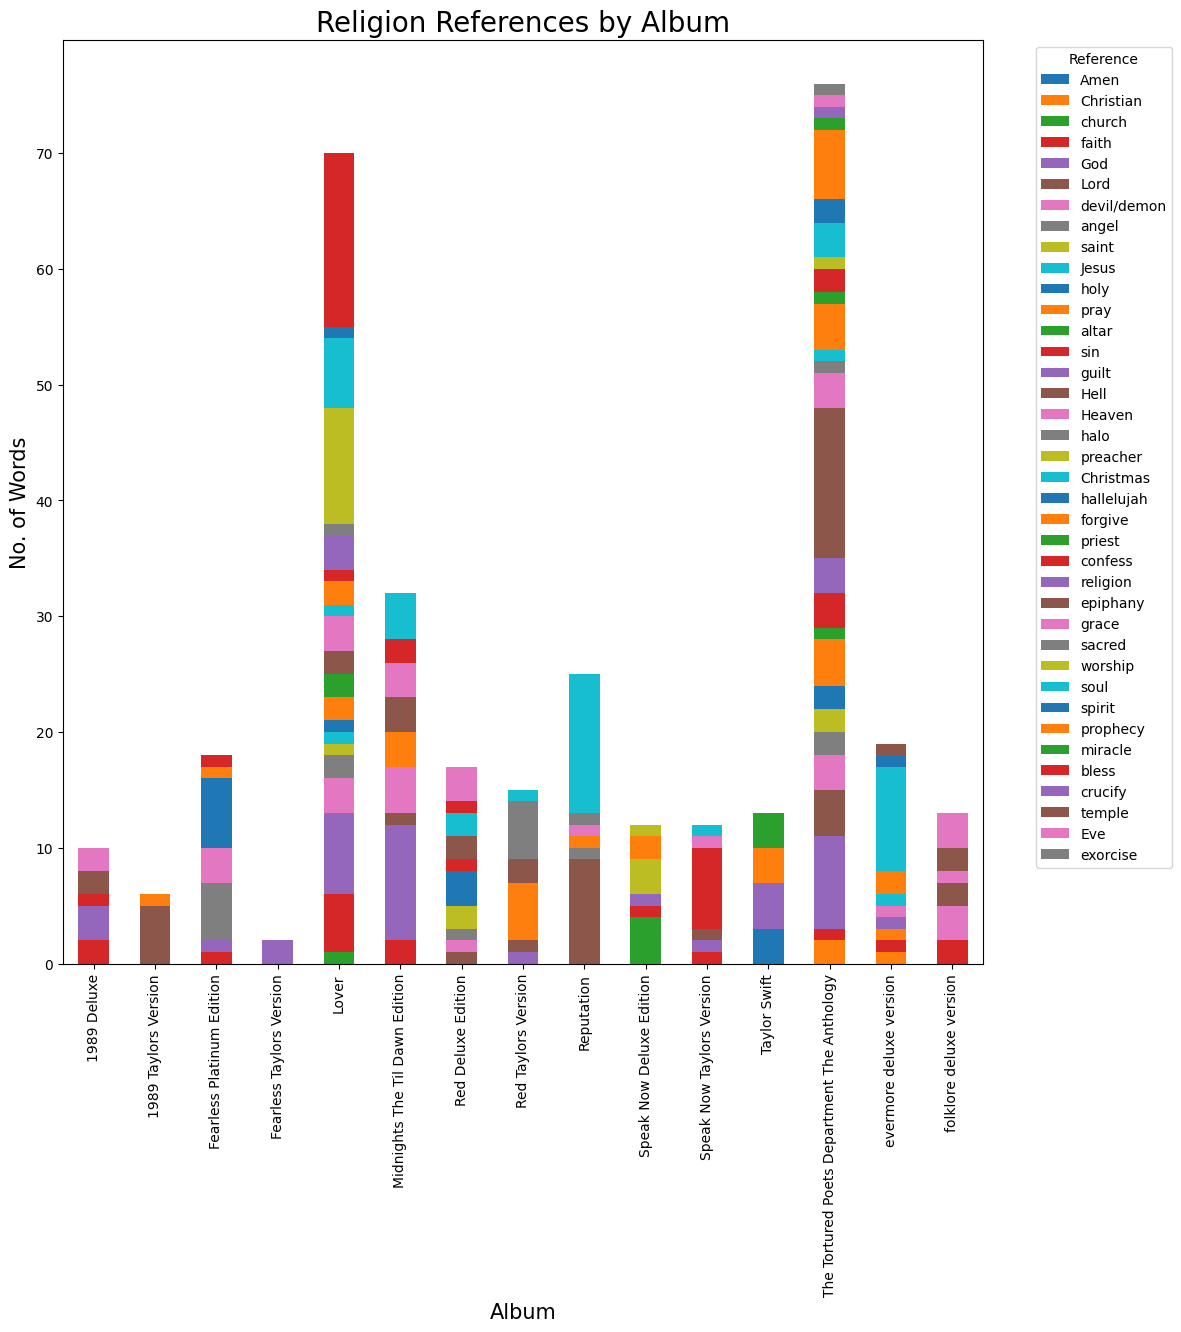

In [124]:
# number of religious words by album color-coded by word

# define data
plotdata = df_rlgn_reduced[['Amen', 'Christian', 'church', 'faith', 'God', 'Lord', 'devil/demon', 'angel', 'saint',
                            'Jesus', 'holy', 'pray', 'altar', 'sin', 'guilt', 'Hell', 'Heaven', 'halo', 'preacher',
                            'Christmas', 'hallelujah', 'forgive', 'priest', 'confess', 'religion', 'epiphany',
                            'grace', 'sacred', 'worship', 'soul', 'spirit', 'prophecy', 'miracle',
                            'bless', 'crucify', 'temple', 'Eve', 'exorcise'
                            ]]

# call function to create static stacked bar graph
plot_stacked_bar_graph(plotdata, 'Reference', 'Religion References by Album', 'No. of Words')

# call function to create interactive stacked bar graph
plot_interactive_bar_graph(df_rlgn_reduced, 'Reference', 'No. of Words', 'Religion References by Album')

### Album Titles in Songs

In [125]:
# create new dataframe to find album titles in songs
df_album = df[['Album', 'Song Name', 'Lyrics']].copy()

# create list of album title
# for 'Red','redhead' is accepted
# for '1989', 'nineteen' and 'eighty-nine' is accepted
# for 'Lover', 'lover' and the plural is accepted
# for 'Midnights', the singular is accepted
# for 'TTPD', 'poet', 'poets', 'poem', and 'poems', is accepted
album_list = ['taylor swift', 'fearless', 'speak now', ' red ', ' redhead ', 'nineteen', 'eighty nine', ' reputation ', ' reputations ',
              ' lover ', ' lovers ', 'folklore', 'evermore', ' midnight ', ' midnights ', 'the tortured poets department', ' poet ',
              ' poets ', ' poem ', ' poems ']

# loop through each string in album_list
# apply find_words function
for col in album_list:
    df_album[col] = df_album['Lyrics'].apply(find_words, pattern=col)
    
df_album.head(2)

Album                 Song Name  \
0  Taylor Swift    A Perfectly Good Heart   
1  Taylor Swift     A Place In This World   

                                              Lyrics  taylor swift  fearless  \
0  why would you wanna break a perfectly good hea...             0         0   
1  i dont know what i want so dont ask me cause i...             0         0   

   speak now   red    redhead   nineteen  eighty nine  ...   lovers   \
0          0      0          0         0            0  ...         0   
1          0      0          0         0            0  ...         0   

   folklore  evermore   midnight    midnights   the tortured poets department  \
0         0         0           0            0                              0   
1         0         0           0            0                              0   

    poet    poets    poem    poems   
0       0        0       0        0  
1       0        0       0        0  

[2 rows x 23 columns]

In [126]:
# create new reduced dataframe
df_album_reduced = df_album[['Album', 'Song Name', 'Lyrics', 'taylor swift', 'fearless', 'speak now', ' red ', ' redhead ',
                             'nineteen', 'eighty nine', ' reputation ', ' reputations ', ' lover ', ' lovers ', 'folklore',
                             'evermore', ' midnight ', ' midnights ', 'the tortured poets department', ' poet ', ' poets ',
                             ' poem ', ' poems ']].copy()

# correct spaces, capitalization, and combine similar  words
df_album_reduced['Taylor Swift'] = df_album_reduced[['taylor swift']]
df_album_reduced['red'] = df_album_reduced[[' red ', ' redhead ']].sum(axis=1)
df_album_reduced['1989'] = df_album_reduced[['nineteen', 'eighty nine']].sum(axis=1)
df_album_reduced['reputation'] = df_album_reduced[[' reputation ', ' reputations ']].sum(axis=1)
df_album_reduced['lover'] = df_album_reduced[[' lover ', ' lovers ']].sum(axis=1)
df_album_reduced['midnights'] = df_album_reduced[[' midnight ', ' midnights ']].sum(axis=1)
df_album_reduced['the tortured poets department'] = df_album_reduced[['the tortured poets department', ' poet ', ' poets ', ' poem ', ' poems ']].sum(axis=1)

# drop now-unnecessary columns
df_album_reduced = df_album_reduced.drop(['taylor swift', ' red ', ' redhead ', 'nineteen', 'eighty nine',
                                          ' reputation ', ' reputations ', ' lover ', ' lovers ', ' midnight ',
                                          ' midnights ', ' poet ', ' poets ', ' poem ', ' poems '],
                                         axis=1)

df_album_reduced.head(2)

Album                 Song Name  \
0  Taylor Swift    A Perfectly Good Heart   
1  Taylor Swift     A Place In This World   

                                              Lyrics  fearless  speak now  \
0  why would you wanna break a perfectly good hea...         0          0   
1  i dont know what i want so dont ask me cause i...         0          0   

   folklore  evermore  the tortured poets department  Taylor Swift  red  1989  \
0         0         0                              0             0    0     0   
1         0         0                              0             0    0     0   

   reputation  lover  midnights  
0           0      0          0  
1           0      0          0

#### Album Titles in Songs - Bar Graphs

In [127]:
# interactive plot
fig = px.bar(df_album_reduced, x='Album', y=['Taylor Swift', 'fearless', 'speak now', 'red', '1989', 'reputation',
                                             'lover', 'folklore', 'evermore', 'midnights', 'the tortured poets department'],
             labels = {'variable' : 'Album Title',
                       'value' : 'No. of Occurrences'},
             title = 'Album Titles in Songs',
             hover_name = 'Song Name',
             )
fig.show()

### Song Titles in Other Songs

#### Clean Song Titles

In [172]:
# create new dateframe with clean song names
df_song_names = df[['Album', 'Song Name', 'Lyrics']].copy()

In [175]:
# words to remove
title_tags = ['Taylors Version', 'From the Vault', 'From The Vault', '10 Minute Version']
funny_words = ['imgonnagetyouback', 'loml', 'Marys Song Oh My My My']

# function to clean song titles
def clean_title(song_title):
    # remove punctuation
    for punctuation in string.punctuation:
        if punctuation == '-':
            song_title = song_title.replace(punctuation, ' ')
        else:
            song_title = song_title.replace(punctuation, '')
    # remove 'taylors version', 'from the vault', and '10 min version'
    for word in title_tags:
        song_title = song_title.replace(word, '')
    # replace misspelled words
    for word in funny_words:
        if word == 'imgonnagetyouback':
            song_title = song_title.replace(word, 'im gonna get you back')
        elif word == 'loml':
            song_title = song_title.replace(word, 'love of my life') # could also be 'loss...'
        elif word == 'Marys Song Oh My My My': # 'Mary's Song' doesn't appear in the song, but 'Oh My My My' does
            song_title = song_title.replace(word, 'oh my my my')
        else:
            return song_title
    return song_title   

# remove non-ASCII charaacters and contractions, apply clean_titles function, and make lowercase
df_song_names['clean_song_name'] = df_song_names['Song Name'].apply(clean_title).str.encode('ascii', 'ignore').str.decode('ascii').str.lower()

#df_song_names.tail()
df_song_names.loc[df_song_names['Album'] == 'Taylor Swift']

Album                        Song Name  \
0   Taylor Swift           A Perfectly Good Heart   
1   Taylor Swift            A Place In This World   
2   Taylor Swift                      Cold as You   
3   Taylor Swift    I'm Only Me When I'm With You   
4   Taylor Swift                        Invisible   
5   Taylor Swift        Mary's Song (Oh My My My)   
6   Taylor Swift                         Our Song   
7   Taylor Swift                  Picture to Burn   
8   Taylor Swift                Should've Said No   
9   Taylor Swift                   Stay Beautiful   
10  Taylor Swift           Teardrops On My Guitar   
11  Taylor Swift                      The Outside   
12  Taylor Swift       Tied Together with a Smile   
13  Taylor Swift                       Tim McGraw   

                                               Lyrics  \
0   why would you wanna break a perfectly good hea...   
1   i dont know what i want so dont ask me cause i...   
2   you have a way of coming easily to me and when...   
3   friday night beneath the stars in a field behi...   
4   she cant see the way your eyes light up when y...   
5   she said i was seven and you were nine i looke...   
6   i was ridin shotgun with my hair undone in the...   
7   state the obvious i didnt get my perfect fanta...   
8   its strange to think the songs we used to sing...   
9   corys eyes are like a jungle he smiles its lik...   
10  drew looks at me i fake a smile so he wont see...   
11  i didnt know what i would find when i went loo...   
12  seems the only one who doesnt see your beauty ...   
13  he said the way my blue eyes shined put those ...   

                  clean_song_name  
0          a perfectly good heart  
1           a place in this world  
2                     cold as you  
3     im only me when im with you  
4                       invisible  
5                     oh my my my  
6                        our song  
7                 picture to burn  
8                shouldve said no  
9                  stay beautiful  
10         teardrops on my guitar  
11                    the outside  
12     tied together with a smile  
13                     tim mcgraw

In [146]:
""" # check for misspelled words
song_names_lst = df_song_names['clean_song_name'].explode().to_list()

# initialize spell checker
spell = SpellChecker()

# find misspelled words
misspelled = spell.unknown(df_song_names['clean_song_name'])
misspelled_list = list(misspelled)

if len(misspelled_list) == 0:
    print('No misspelled words!')
else:
    print(misspelled_list)
    for word in misspelled:
        print(spell.correction(word))
        print(spell.candidates(word)) """

" # check for misspelled words\nsong_names_lst = df_song_names['clean_song_name'].explode().to_list()\n\n# initialize spell checker\nspell = SpellChecker()\n\n# find misspelled words\nmisspelled = spell.unknown(df_song_names['clean_song_name'])\nmisspelled_list = list(misspelled)\n\nif len(misspelled_list) == 0:\n    print('No misspelled words!')\nelse:\n    print(misspelled_list)\n    for word in misspelled:\n        print(spell.correction(word))\n        print(spell.candidates(word)) "

#### Search for Song Names in Other Songs

In [176]:
# create list of clean song titles
song_titles_list = df_song_names['clean_song_name'].explode().tolist()

# replace spaces
song_titles_list_new = []
for i in song_titles_list:
    song_titles_list = i.replace('  ', '')
    song_titles_list_new.append(song_titles_list)

# remove to avoid skewing data, too many lyrics cantain the 'me'
song_titles_list_new.remove('me')

print(song_titles_list_new) 

['a perfectly good heart', 'a place in this world', 'cold as you', 'im only me when im with you', 'invisible', 'oh my my my', 'our song', 'picture to burn', 'shouldve said no', 'stay beautiful', 'teardrops on my guitar', 'the outside', 'tied together with a smile', 'tim mcgraw', 'breathe', 'change', 'come in with the rain', 'fearless', 'fifteen', 'foreveralways', 'hey stephen', 'jump then fall', 'love story', 'superstar', 'tell me why', 'the best day', 'the other side of the door', 'the way i loved you', 'untouchable', 'white horse', 'youre not sorry', 'you belong with me', 'bye bye baby', 'dont you', 'mr perfectly fine', 'thats when', 'we were happy', 'you all over me', 'back to december', 'better than revenge', 'dear john', 'enchanted', 'haunted', 'if this was a movie', 'innocent', 'last kiss', 'long live', 'mean', 'mine', 'never grow up', 'ours', 'sparks fly', 'speak now', 'superman', 'the story of us', 'castles crumbling', 'electric touch', 'foolish one', 'i can see you', 'timeless

In [177]:
# loop through each string in song_titles_list
# apply find_words function
for col in song_titles_list_new:
    df_song_names[col] = df_song_names['Lyrics'].apply(find_words, pattern=col)   

df_song_names.head(3)

/tmp/ipykernel_58491/3507888508.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_58491/3507888508.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_58491/3507888508.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_58491/3507888508.py:4: Performance

Album                 Song Name  \
0  Taylor Swift    A Perfectly Good Heart   
1  Taylor Swift     A Place In This World   
2  Taylor Swift               Cold as You   

                                              Lyrics  \
0  why would you wanna break a perfectly good hea...   
1  i dont know what i want so dont ask me cause i...   
2  you have a way of coming easily to me and when...   

            clean_song_name  a perfectly good heart  a place in this world  \
0    a perfectly good heart                       7                      0   
1     a place in this world                       0                      3   
2               cold as you                       0                      0   

   cold as you  im only me when im with you  invisible  oh my my my  ...  \
0            0                            0          0            0  ...   
1            0                            0          0            0  ...   
2            3                            0          0            0  ...   

   the black dog  the bolter  the manuscript  the prophecy  \
0              0           0               0             0   
1              0           0               0             0   
2              0           0               0             0   

   the smallest man who ever lived  the tortured poets department  \
0                                0                              0   
1                                0                              0   
2                                0                              0   

   whos afraid of little old me  im gonna get you back  thank you aimee  \
0                             0                      0                0   
1                             0                      0                0   
2                             0                      0                0   

   love of my life  
0                0  
1                0  
2                0  

[3 rows x 232 columns]

#### Song Titles - Bar Graph

In [178]:
# interactive plot
y = [song_titles_list]
fig = px.bar(df_song_names, x='Album', y=['a perfectly good heart', 'a place in this world', 'cold as you', 'im only me when im with you', 'invisible', 'oh my my my', 'our song', 'picture to burn', 'shouldve said no', 'stay beautiful', 'teardrops on my guitar', 'the outside', 'tied together with a smile', 'tim mcgraw', 'breathe', 'change', 'come in with the rain', 'fearless', 'fifteen', 'foreveralways', 'hey stephen', 'jump then fall', 'love story', 'superstar', 'tell me why', 'the best day', 'the other side of the door', 'the way i loved you', 'untouchable', 'white horse', 'youre not sorry', 'you belong with me', 'bye bye baby', 'dont you', 'mr perfectly fine', 'thats when', 'we were happy', 'you all over me', 'back to december', 'better than revenge', 'dear john', 'enchanted', 'haunted', 'if this was a movie', 'innocent', 'last kiss', 'long live', 'mean', 'mine', 'never grow up', 'ours', 'sparks fly', 'speak now', 'superman', 'the story of us', 'castles crumbling', 'electric touch', 'foolish one', 'i can see you', 'timeless', 'when emma falls in love', '22', 'all too well', 'begin again', 'come back be here', 'everything has changed', 'girl at home', 'holy ground', 'i almost do', 'i knew you were trouble', 'red', 'sad beautiful tragic', 'starlight', 'state of grace', 'stay stay stay', 'the last time', 'the lucky one', 'the moment i knew', 'treacherous', 'we are never ever getting back together', 'all too well ', 'babe', 'better man', 'forever winter', 'i bet you think about me', 'message in a bottle', 'nothing new', 'run', 'the very first night', 'all you had to do was stay', 'bad blood', 'blank space', 'clean', 'how you get the girl', 'i know places', 'i wish you would', 'new romantics', 'out of the woods', 'shake it off', 'style', 'this love', 'welcome to new york', 'wildest dreams', 'wonderland', 'you are in love', 'is it over now', 'now that we dont talk', 'say dont go', 'slut', 'suburban legends', 'call it what you want', 'dancing with our hands tied', 'delicate', 'dont blame me', 'dress', 'end game', 'getaway car', 'gorgeous', 'i did something bad', 'king of my heart', 'look what you made me do', 'new years day', 'ready for it', 'so it goes', 'this is why we cant have nice things', 'afterglow', 'cornelia street', 'cruel summer', 'daylight', 'death by a thousand cuts', 'false god', 'i forgot that you existed', 'i think he knows', 'its nice to have a friend', 'london boy', 'lover', 'miss americanathe heartbreak prince', 'paper rings', 'soon youll get better', 'the archer', 'the man', 'you need to calm down', 'august', 'betty', 'cardigan', 'epiphany', 'exile', 'hoax', 'illicit affairs', 'invisible string', 'mad woman', 'mirrorball', 'my tears ricochet', 'peace', 'seven', 'the 1', 'the lakes', 'the last great american dynasty', 'this is me trying', 'tis the damn season', 'champagne problems', 'closure', 'coney island', 'cowboy like me', 'dorothea', 'evermore', 'gold rush', 'happiness', 'its time to go', 'ivy', 'long story short', 'marjorie', 'no body no crime', 'right where you left me', 'tolerate it', 'willow', 'anti hero', 'bejeweled', 'bigger than the whole sky', 'dear reader', 'glitch', 'high infidelity', 'hits different', 'karma', 'labyrinth', 'lavender haze', 'maroon', 'mastermind', 'midnight rain', 'paris', 'question', 'snow on the beach', 'sweet nothing', 'the great war', 'vigilante shit', 'wouldve couldve shouldve', 'youre on your own kid', 'but daddy i love him', 'cassandra', 'chloe or sam or sophia or marcus', 'clara bow', 'down bad', 'florida', 'fortnight', 'fresh out the slammer', 'guilty as sin', 'how did it end', 'i can do it with a broken heart', 'i can fix him no really i can', 'i hate it here', 'i look in peoples windows', 'my boy only breaks his favorite toys', 'peter', 'robin', 'so high school', 'so long london', 'the albatross', 'the alchemy', 'the black dog', 'the bolter', 'the manuscript', 'the prophecy', 'the smallest man who ever lived', 'the tortured poets department', 'whos afraid of little old me', 'im gonna get you back', 'thank you aimee', 'love of my life'],
             labels = {'variable' : 'Song Name that Appears',
                       'value' : 'No. of Appearance'},
             title = 'Song Titles in Songs',
             hover_name = 'Song Name',
             )
fig.show()